In [121]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from scipy.spatial.transform import Rotation as R


In [122]:
def generate_points(n_handle=10, n_head=100, seed=13):
    # x, y, z
    min_handle = np.array([-3, -1, -1])
    max_handle = np.array([1, 1, 1])

    min_head = np.array([1, -1, -2])
    max_head = np.array([2, 1, 2])

    np.random.seed(seed)
    handle_points = np.random.uniform(min_handle, max_handle,
                                      [n_handle, 3])
    head_points = np.random.uniform(min_head, max_head,
                                    [n_handle, 3])

    return np.vstack([handle_points, head_points])

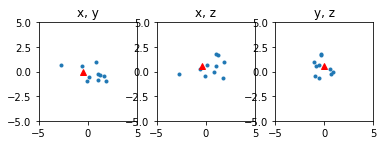

In [123]:
hammer = generate_points(5, 100)
min_hammer = np.min(hammer, axis=0)
max_hammer = np.max(hammer, axis=0)
mid_hammer = min_hammer + (max_hammer - min_hammer) * 0.5

fw = 5.
plot_lim = 5
order = [[0, 1, 'x, y'],
         [0, 2, 'x, z'],
         [1, 2, 'y, z']]

fig = plt.plot(figsize=(fw*5, fw*1))
for p in range(3):
    ax = plt.subplot(1, 3, p+1)
    ax.set_title(order[p][2])
    ax.plot(hammer[:, order[p][0]], hammer[:, order[p][1]], '.')
    ax.plot(mid_hammer[order[p][0]], mid_hammer[order[p][1]], 'r^')
    ax.set_xlim(-plot_lim, plot_lim)
    ax.set_ylim(-plot_lim, plot_lim)
    ax.set_aspect('equal', 'box')

plt.show()

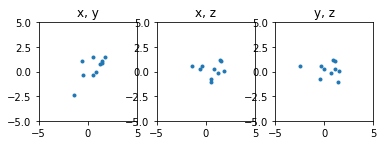

In [124]:
# ROTATE
r = R.from_euler('xyz', [30, 10, 75], degrees=True)
hammer_rotated = r.apply(hammer)

fig = plt.plot(figsize=(fw*5, fw*1))
for p in range(3):
    ax = plt.subplot(1, 3, p+1)
    ax.set_title(order[p][2])
    ax.plot(hammer_rotated[:, order[p][0]],
            hammer_rotated[:, order[p][1]], '.')
    ax.set_xlim(-plot_lim, plot_lim)
    ax.set_ylim(-plot_lim, plot_lim)
    ax.set_aspect('equal', 'box')

plt.show()

Means for the transformed 'hammer'
[1.52936805 1.35186884 1.20240413]
Middle point for the transformed 'hammer'
[1.18658114 0.54013616 1.08279192]


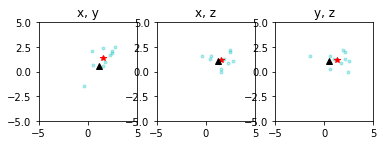

In [125]:
hammer_rot_trans = hammer_rotated + 1.0
print("Means for the transformed 'hammer'")
means_transformed = np.mean(hammer_rot_trans, axis=0)
print(means_transformed)
min_trans = np.min(hammer_rot_trans, axis=0)
max_trans = np.max(hammer_rot_trans, axis=0)
mid_trans = (max_trans + min_trans) * 0.5
print("Middle point for the transformed 'hammer'")
print(mid_trans)

fig = plt.plot(figsize=(fw*5, fw*1))
for p in range(3):
    ax = plt.subplot(1, 3, p+1)
    ax.set_title(order[p][2])
    ax.plot(hammer_rot_trans[:, order[p][0]],
            hammer_rot_trans[:, order[p][1]],
            'c.', alpha=0.3)
    ax.plot(means_transformed[order[p][0]],
            means_transformed[order[p][1]],
            'r*')
    ax.plot(mid_trans[order[p][0]],
            mid_trans[order[p][1]],
            'k^')

    ax.set_xlim(-plot_lim, plot_lim)
    ax.set_ylim(-plot_lim, plot_lim)
    ax.set_aspect('equal', 'box')

plt.show()


Means for the transformed 'hammer'
[ 4.44089210e-17 -5.41233725e-17  3.10862447e-16]
Middle point for the transformed 'hammer'
[1.18658114 0.54013616 1.08279192]


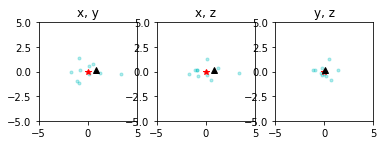

In [126]:

pca = PCA(3)
hammer_pca = pca.fit_transform(hammer_rot_trans)
print("Means for the transformed 'hammer'")
means_pca = np.mean(hammer_pca, axis=0)
print(means_pca)
min_pca = np.min(hammer_pca, axis=0)
max_pca = np.max(hammer_pca, axis=0)
mid_pca = (max_pca + min_pca) * 0.5
print("Middle point for the transformed 'hammer'")
print(mid_trans)

fig = plt.plot(figsize=(fw*5, fw*1))
for p in range(3):
    ax = plt.subplot(1, 3, p+1)
    ax.set_title(order[p][2])
    ax.plot(hammer_pca[:, order[p][0]],
            hammer_pca[:, order[p][1]],
            'c.', alpha=0.3)
    ax.plot(means_pca[order[p][0]],
            means_pca[order[p][1]],
            'r*')
    ax.plot(mid_pca[order[p][0]],
            mid_pca[order[p][1]],
            'k^')

    ax.set_xlim(-plot_lim, plot_lim)
    ax.set_ylim(-plot_lim, plot_lim)
    ax.set_aspect('equal', 'box')

plt.show()

In [127]:
recons_means_pca = pca.inverse_transform(means_pca)
print(recons_means_pca)
print(means_transformed)

[1.52936805 1.35186884 1.20240413]
[1.52936805 1.35186884 1.20240413]
